In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
df = pd.read_csv('clean_temp.csv', parse_dates=True, index_col=0)
df = df.resample('1M').mean()
df.head(2)

,TEMP
DATE,
1876-01-31,-2.070968
1876-02-29,2.389655


In [5]:
df_train = df["2016":"2020"]
df_test = df["2021":]

In [6]:
y_train = df_train['TEMP']

<AxesSubplot:title={'center':'Berlin Temperature'}, xlabel='Time', ylabel='Temperature'>

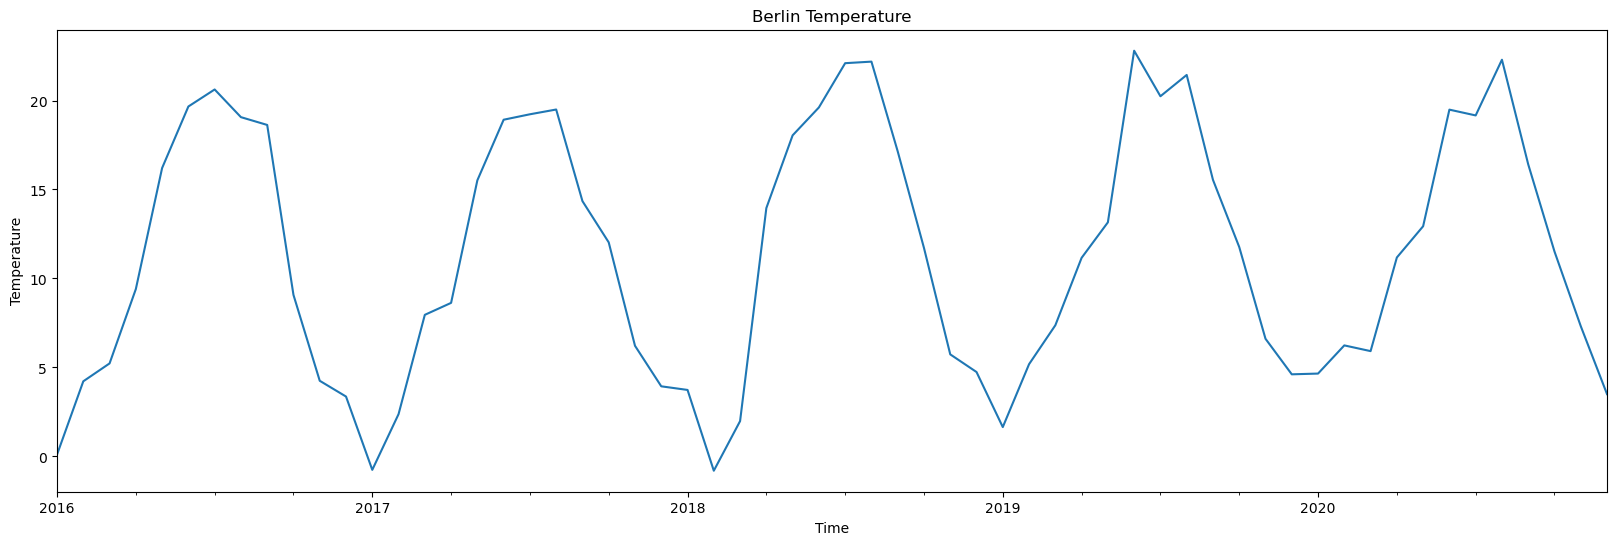

In [7]:
y_train.plot(
    figsize=(20, 6),
    title='Berlin Temperature',
    ylabel='Temperature',
    xlabel='Time'
)

<AxesSubplot: xlabel='DATE'>

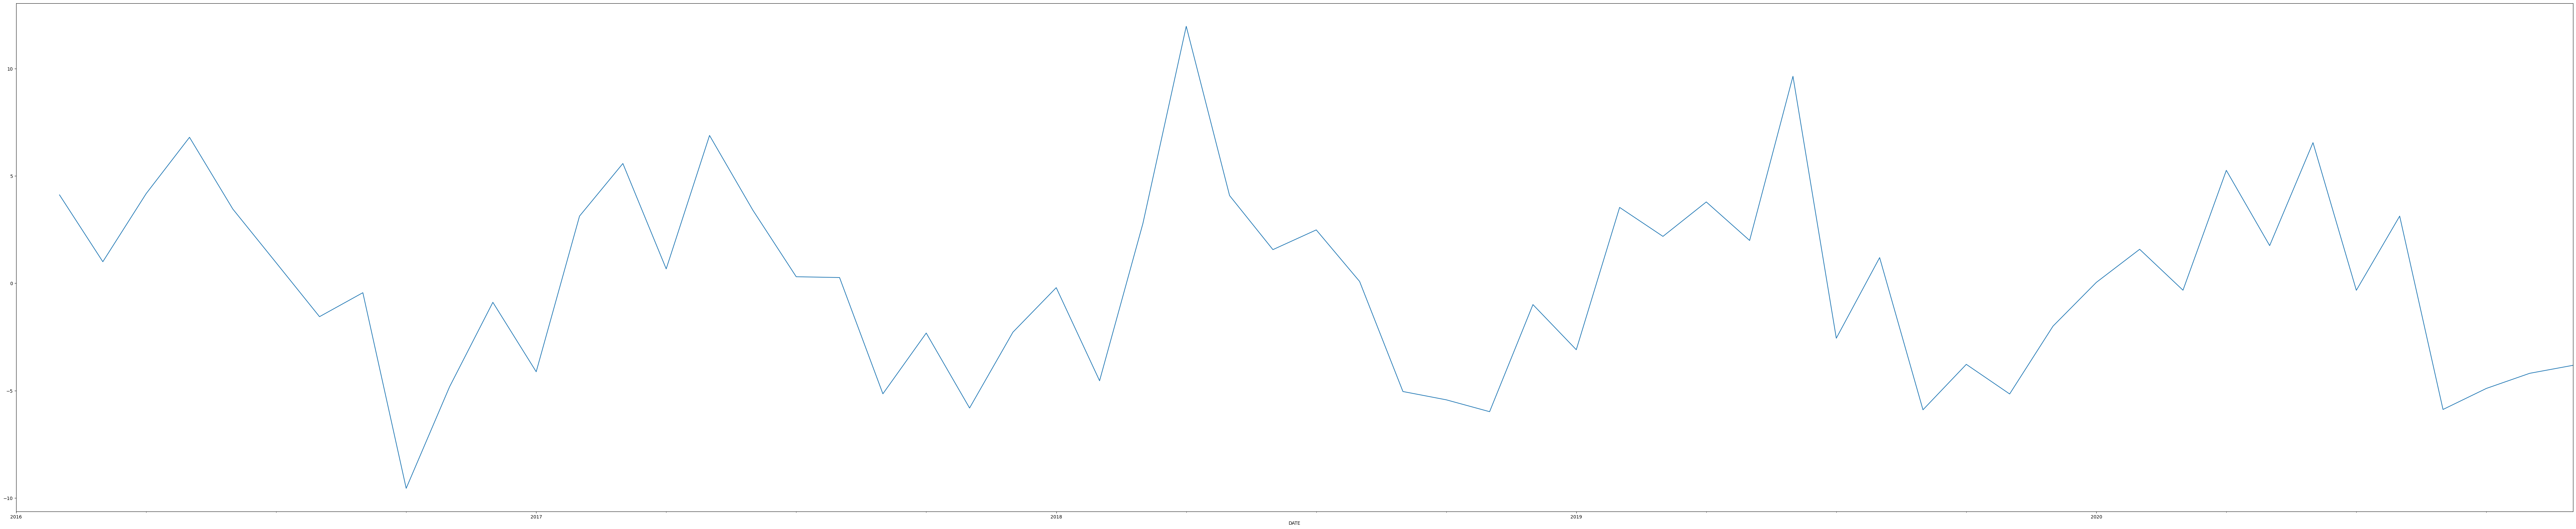

In [17]:
y_train.diff().plot(figsize=(100,20))

<AxesSubplot: xlabel='DATE'>

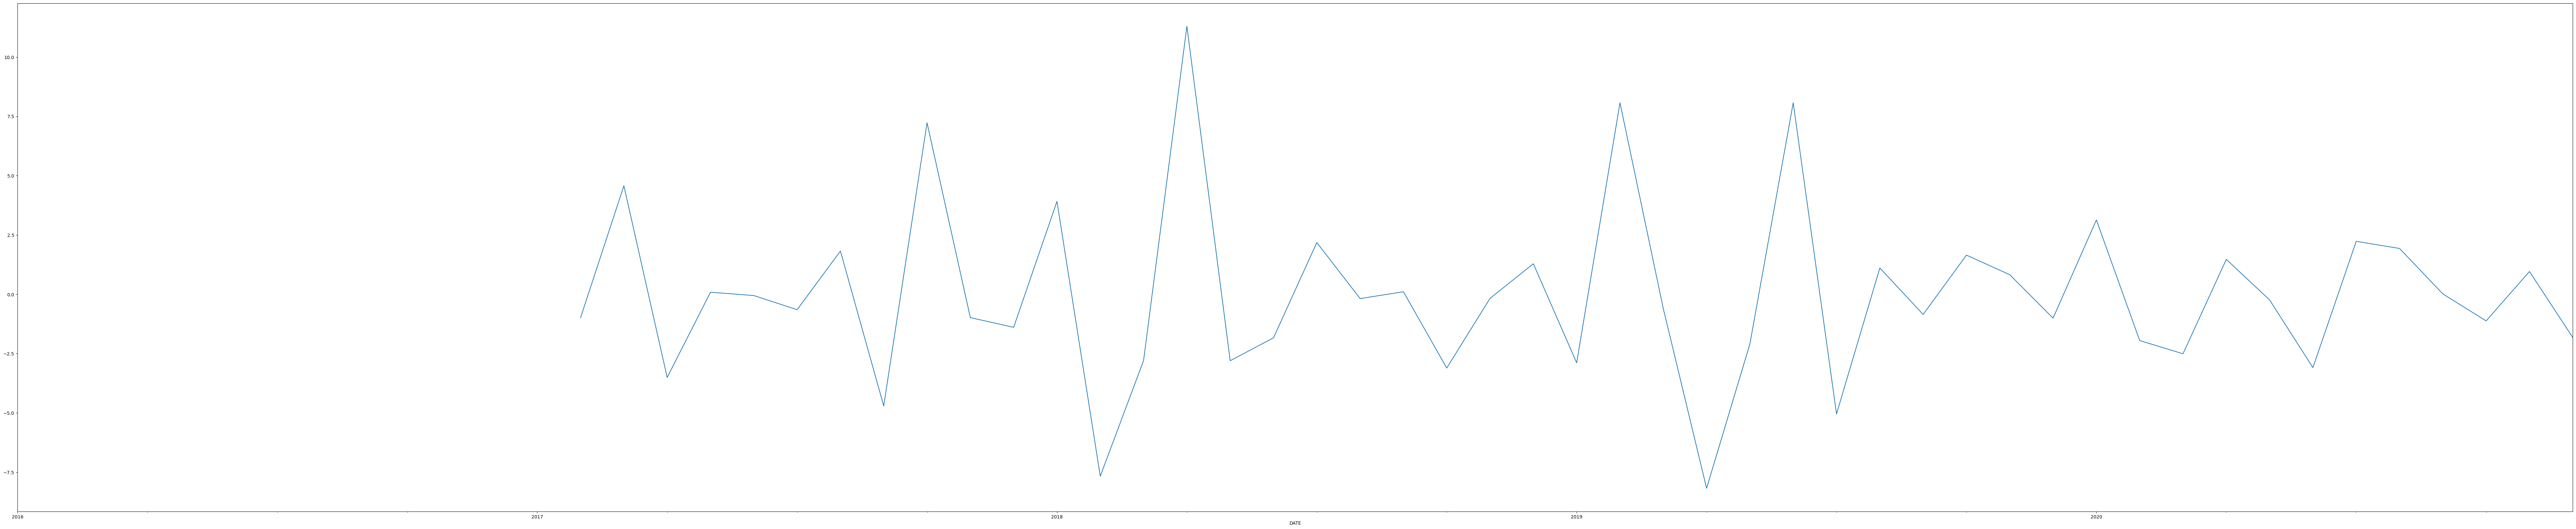

In [18]:
y_train.diff().diff(12).plot(figsize=(100,20))

In [19]:
arima = pm.AutoARIMA(
    m=12,              # seasonality cycle
    d=1,               # apply differences
    maxiter=10000,
    seasonal=True,
    start_p=1, 
    start_q=1,
    stepwise=True,
    trace=True,
    test='adf' 
)

arima.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=297.053, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=343.590, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=322.266, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=332.268, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=341.601, Time=0.01 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=332.645, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=335.088, Time=0.02 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=299.958, Time=0.29 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20

AutoARIMA(d=1, m=12, maxiter=10000, start_p=1, start_q=1, test='adf',
          trace=True)

In [20]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -142.527
Date:                            Fri, 11 Nov 2022   AIC                            297.053
Time:                                    11:30:56   BIC                            309.518
Sample:                                01-31-2016   HQIC                           301.919
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.755e-05      0.000      0.247      0.805      -0.001       0.001
ar.L1          0.2645      0.138      1.923      0.055      -0.005       0.534
ma.L1         -0.9900      0.083    -11.871      0.000      -1.153      -0.827
ar.S.L12       0.9943      0.019     51.997      0.000       0.957       1.032
ma.S.L12      -0.7256      0.416     -1.745      0.081      -1.541       0.089
sigma2         4.5149      1.504      3.001      0.003       1.567       7.463
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.88   Prob(JB):                         0.98
Heteroskedasticity (H):               0.82   Skew:                            -0.04
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

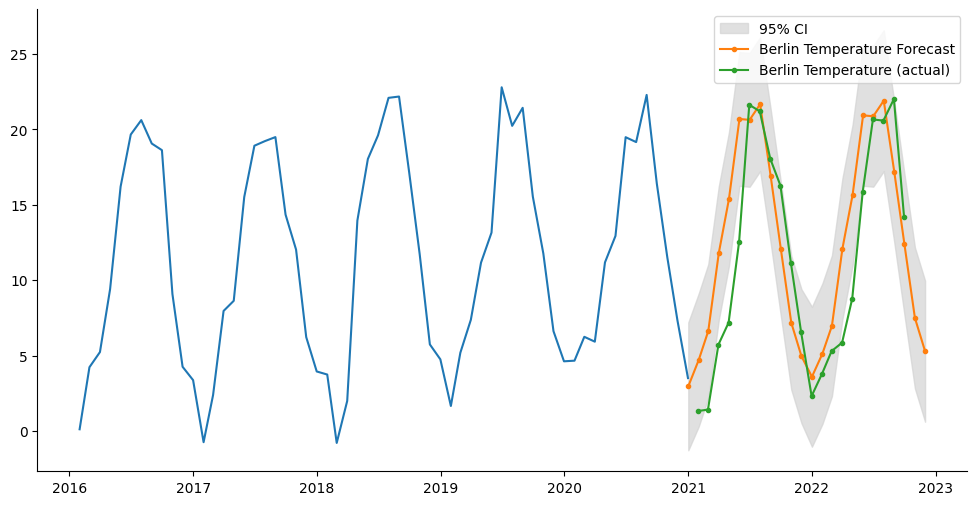

In [21]:
# forecast for the next 5 years with uncertainty area
y_forecast, ci = arima.predict(n_periods=12*2, return_conf_int=True)

# create some date values for the forecast horizon
index_vals = pd.date_range('2021-01-01', '2022-12-01', freq='MS')


plt.figure(figsize=(12,6))
plt.plot(df_train.index.values, df_train.values)
plt.fill_between(index_vals.values, ci[:,0], ci[:, 1], alpha=0.7, color='lightgrey', label='95% CI')
plt.plot(index_vals.values, y_forecast, label='Berlin Temperature Forecast', marker='.')
plt.plot(df_test.index, df_test['TEMP'], label='Berlin Temperature (actual)', marker='.')
sns.despine()
plt.legend()

In [25]:
df = df["2000":]
arima = pm.AutoARIMA(
    m=12,              # seasonality cycle
    d=1,               # apply differences
    maxiter=10000,
    seasonal=True,
    start_p=1, 
    start_q=1,
    stepwise=True,
    trace=True,
    test='adf' 
)

model_fit = arima.fit(df['TEMP'])
import pickle
with open('model_arima_2016.pkl', 'wb') as pkl:
    pickle.dump(arima, pkl)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=463.081, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=428.440, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=445.322, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=461.217, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=448.126, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=444.159, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=403.356, Time=0.26 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=404.491, Time=0.32 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=403.797, Time=0.29 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=409.252, Time=0.48 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=399.730, Time=0.41 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=39